In [45]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import timm

import matplotlib.pyplot as plt # For data viz
import pandas as pd
import numpy as np
import sys
from tqdm.notebook import tqdm

In [72]:
df_heart = pd.read_csv('heart.csv')

In [49]:
df_heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [50]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [51]:
df_heart.shape

(303, 14)

In [54]:
df_heart.drop_duplicates(keep='first', inplace=True)

In [55]:
df_heart.shape

(302, 14)

In [56]:
df_heart.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [57]:
df_heart.corr

<bound method DataFrame.corr of      age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  ou

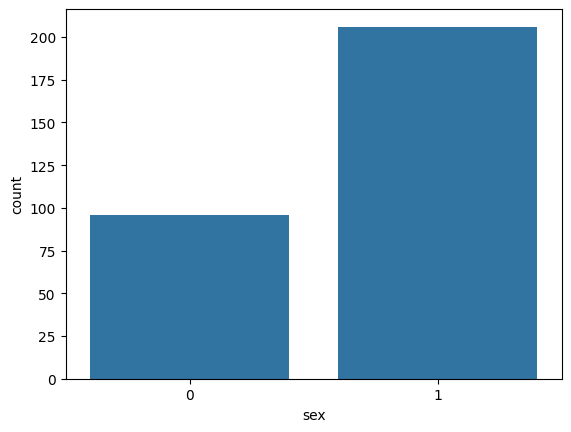

In [59]:
import seaborn as sns
x=(df_heart.sex.value_counts)
p = sns.countplot(data=df_heart, x='sex')
plt.show()

cp
0    143
2     86
1     50
3     23
Name: count, dtype: int64


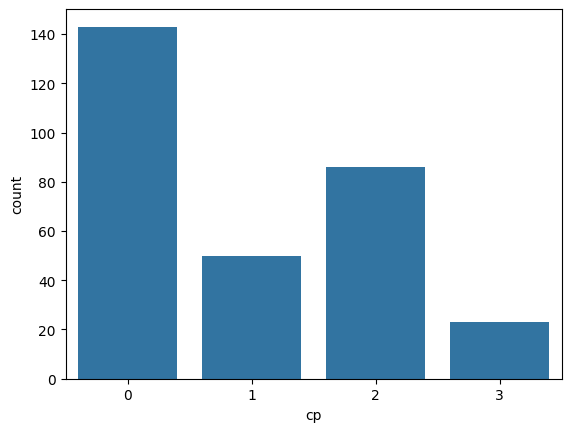

In [61]:
x=(df_heart.cp.value_counts())
print(x)
p = sns.countplot(data=df_heart, x="cp")
plt.show()

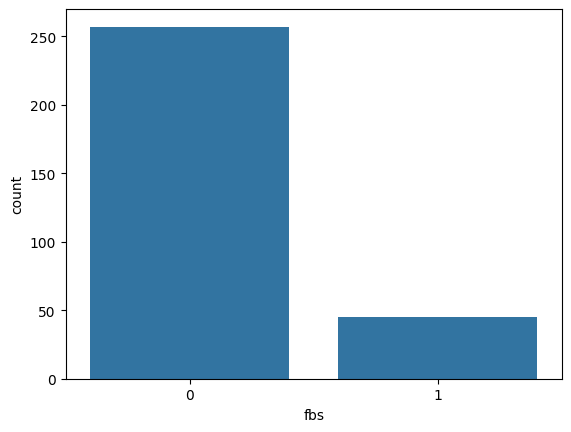

In [62]:
p=sns.countplot(data=df_heart, x="fbs") 

<Axes: xlabel='exng', ylabel='count'>

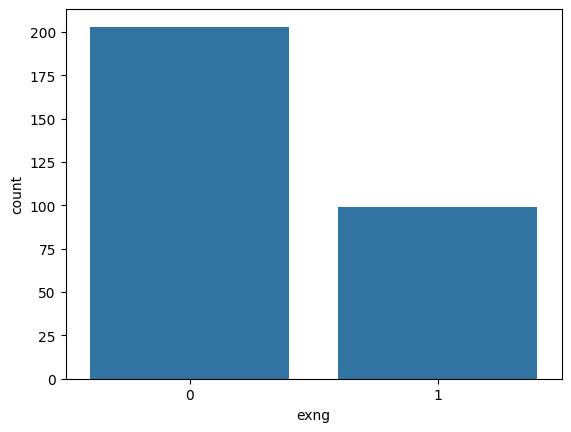

In [63]:
sns.countplot(data=df_heart, x='exng')

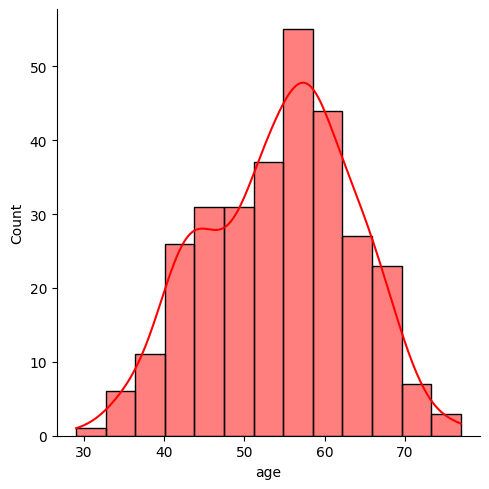

In [66]:
sns.displot(df_heart.age, color='red', label='Age', kde=True)

<Figure size 2000x2000 with 0 Axes>

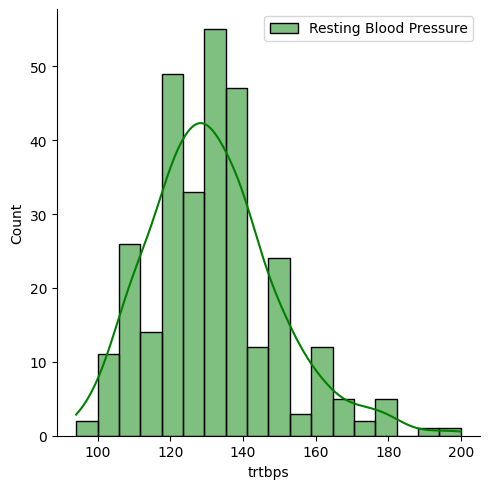

In [67]:
plt.figure(figsize=(20,20))
sns.displot(df_heart.trtbps , color="green", label="Resting Blood Pressure", kde= True)
plt.legend()

<Figure size 1000x1000 with 0 Axes>

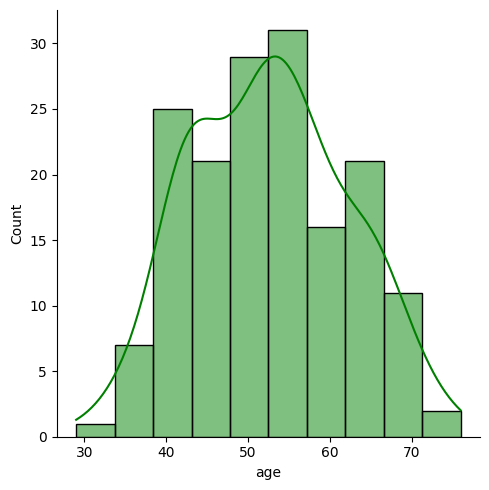

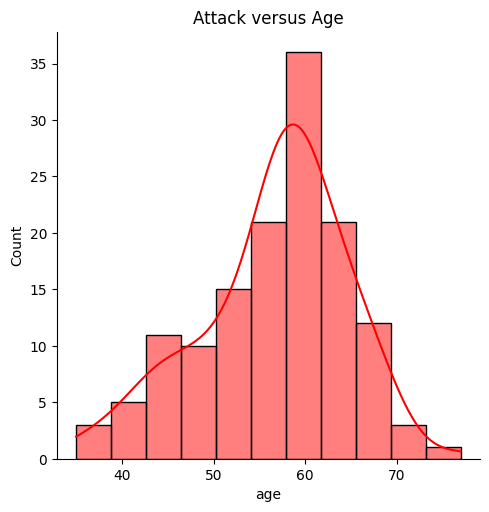

In [69]:
plt.figure(figsize=(10,10))
sns.displot(df_heart[df_heart['output']==1]["age"], color='green', kde=True)
sns.displot(df_heart[df_heart['output']==0]['age'], color='red',kde=True)
plt.title("Attack versus Age")
plt.show()

Text(0.5, 1.0, 'Cholestrol versus age')

<Figure size 1000x1000 with 0 Axes>

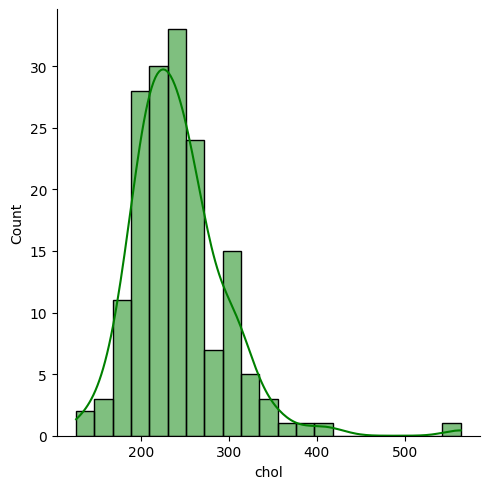

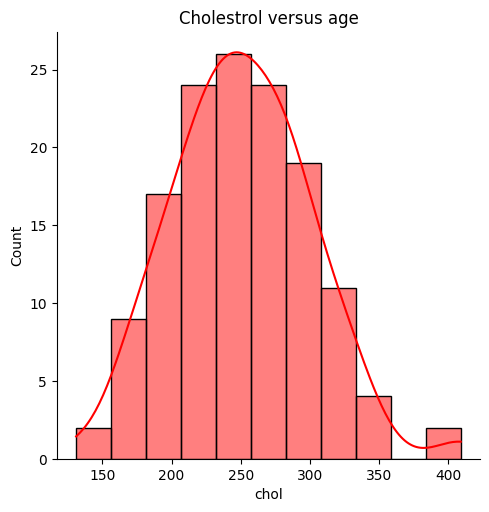

In [74]:
plt.figure(figsize=(10,10))
sns.displot(df_heart[df_heart['output'] == 1]['chol'], color='green', kde=True)
sns.displot(df_heart[df_heart['output'] == 0]['chol'], color='red', kde=True)
plt.title("Cholestrol versus age")

<Figure size 1000x1000 with 0 Axes>

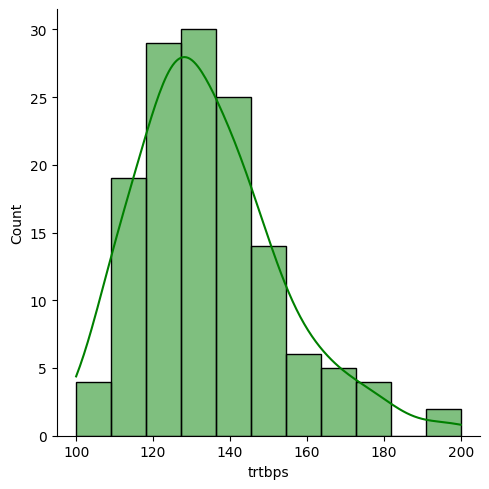

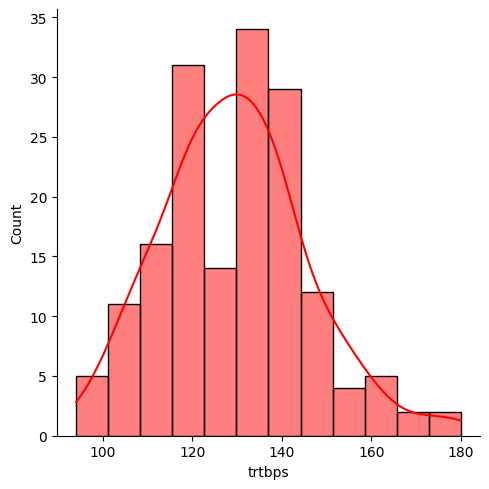

In [75]:
plt.figure(figsize=(10,10))
sns.displot(df_heart[df_heart['output']==0]['trtbps'], color='green', kde=True,)
sns.displot(df_heart[df_heart['output']==1]['trtbps'], color='red', kde=True,)

<Figure size 2000x2000 with 0 Axes>

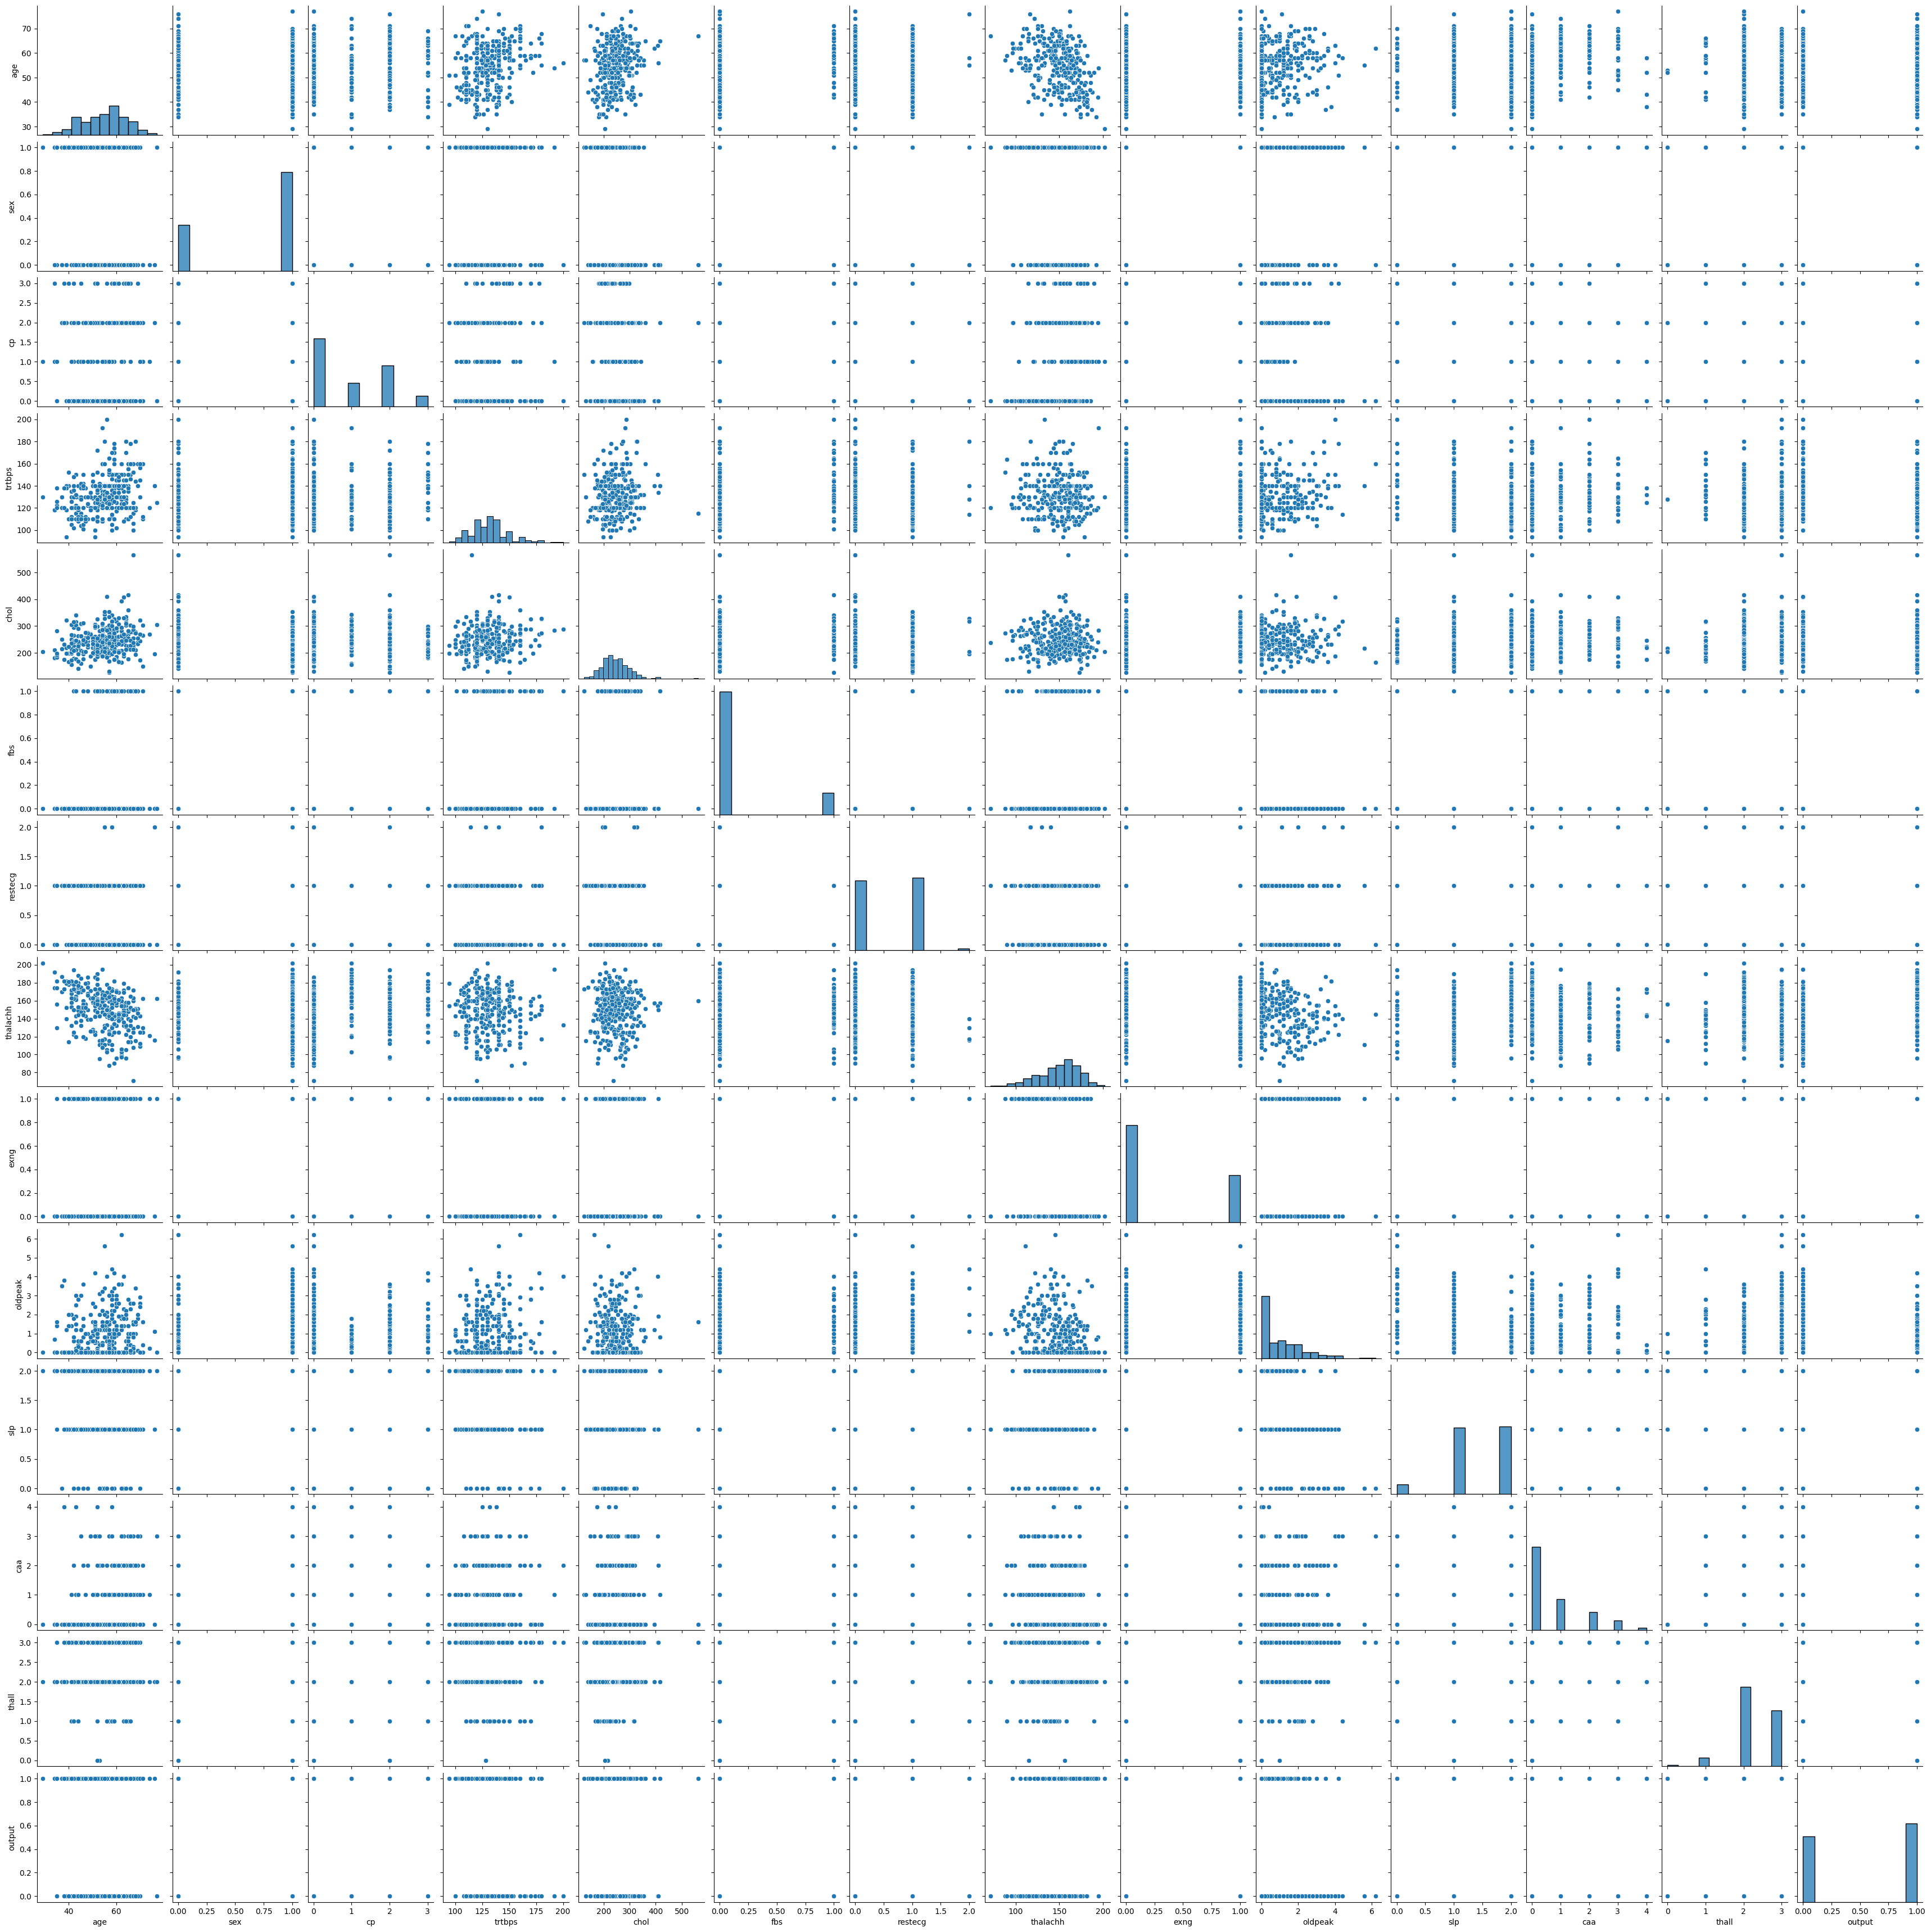

In [76]:
plt.figure(figsize=(20,20))
sns.pairplot(df_heart)
plt.show()

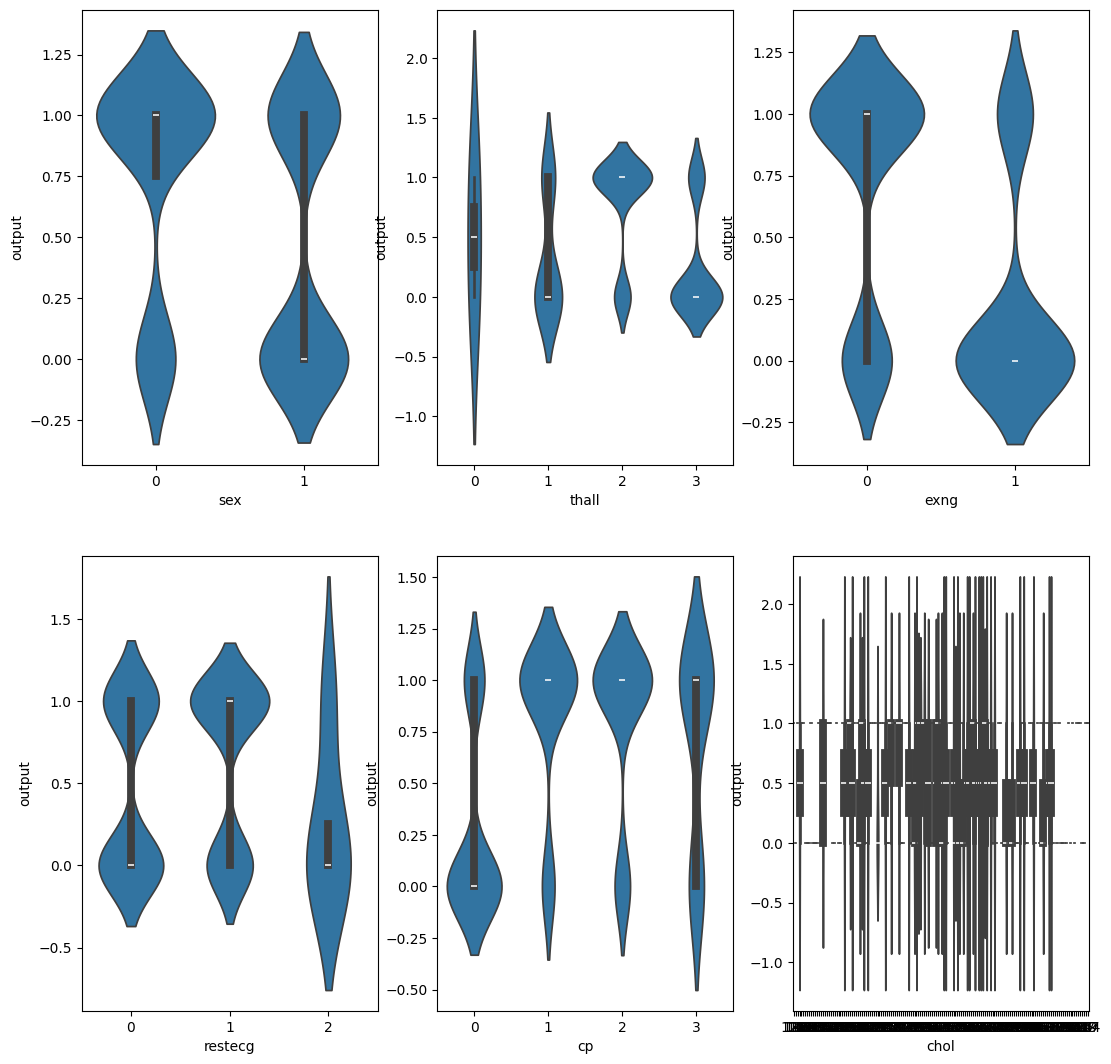

In [83]:
plt.figure(figsize=(13,13))
plt.subplot(2,3,1)
sns.violinplot(x = 'sex', y = 'output', data = df_heart)
plt.subplot(2,3,2)
sns.violinplot(x = 'thall', y = 'output', data = df_heart)
plt.subplot(2,3,3)
sns.violinplot(x = 'exng', y = 'output', data = df_heart)
plt.subplot(2,3,4)
sns.violinplot(x = 'restecg', y = 'output', data = df_heart)
plt.subplot(2,3,5)
sns.violinplot(x = 'cp', y = 'output', data = df_heart)

plt.subplot(2,3,6)
sns.violinplot(x = 'chol', y = 'output', data = df_heart)



plt.show()

In [89]:
x = df_heart.iloc[:, 1:-1].values
y = df_heart.iloc[:, -1].values

In [90]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [91]:
x_train.shape
x_test.shape
y_train.shape
y_test.shape

(61,)

In [92]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [96]:
from sklearn.metrics import confusion_matrix, accuracy_score
model.fit(x_train, y_train)
predicted = model.predict(x_test)
conf = confusion_matrix(y_test, predicted)
s = accuracy_score(y_test, predicted)*100

print(conf, s)

[[22  5]
 [ 4 30]] 85.24590163934425


/home/vaibhav/machine-learning-notebooks/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [97]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train)
  
predicted = model.predict(x_test)
  
print("The accuracy of Gaussian Naive Bayes model is : ", accuracy_score(y_test, predicted)*100, "%")

The accuracy of Gaussian Naive Bayes model is :  86.88524590163934 %
